### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Loading Dataset

In [2]:
train_data = pd.read_csv("Dataset/Google_Stock_Price_Train.csv")
test_data = pd.read_csv("Dataset/Google_Stock_Price_Test.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [4]:
train_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


### Data Preprocessing

### Training Data

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_data_scaled = train_data.iloc[:, 1:2].values
train_data_scaled = sc.fit_transform(train_data_scaled)

In [6]:
# Creating and Independent and Dependent Variables
X_train = []
Y_train = []

for i in range(60, 1258):
    X_train.append(train_data_scaled[i-60:i, 0])
    Y_train.append(train_data_scaled[i, 0])
    
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
X_train.shape

(1198, 60, 1)

### Testing Data

In [8]:
real_stock_price = test_data.iloc[:, 1:2].values
real_stock_price.shape

(20, 1)

In [9]:
dataset_total = pd.concat((train_data['Open'], test_data['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [10]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [11]:
X_test.shape

(20, 60, 1)

### Model Preparation

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [13]:
# Initialising RNN
reg = Sequential()

# LSTM Layer 1
reg.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
reg.add(Dropout(0.2))

# LSTM Layer 2
reg.add(LSTM(units=50, return_sequences=True))
reg.add(Dropout(0.2))

# LSTM Layer 3
reg.add(LSTM(units=50, return_sequences=True))
reg.add(Dropout(0.2))

# LSTM Layer 4
reg.add(LSTM(units=50))
reg.add(Dropout(0.2))

# Adding Output Layers
reg.add(Dense(units = 1))

# Compiling RNN
reg.compile(optimizer='adam', loss='mean_squared_error')

### Training , Testing, Visualization

Loop Count 1
Epoch 1/10
38/38 [==============================] - 3s 88ms/step - loss: 0.0373
Epoch 2/10
38/38 [==============================] - 3s 76ms/step - loss: 0.0068
Epoch 3/10
38/38 [==============================] - 3s 74ms/step - loss: 0.0057
Epoch 4/10
38/38 [==============================] - 3s 74ms/step - loss: 0.0064
Epoch 5/10
38/38 [==============================] - 3s 74ms/step - loss: 0.0051
Epoch 6/10
38/38 [==============================] - 3s 74ms/step - loss: 0.0045
Epoch 7/10
38/38 [==============================] - 3s 76ms/step - loss: 0.0052
Epoch 8/10
38/38 [==============================] - 3s 74ms/step - loss: 0.0044
Epoch 9/10
38/38 [==============================] - 3s 74ms/step - loss: 0.0047
Epoch 10/10
38/38 [==============================] - 3s 77ms/step - loss: 0.0044


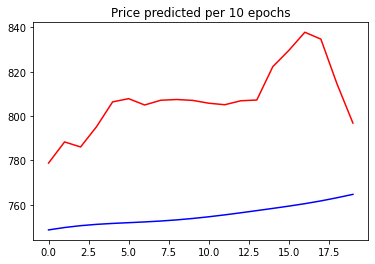

Loop Count 2
Epoch 1/10
38/38 [==============================] - 3s 78ms/step - loss: 0.0040
Epoch 2/10
38/38 [==============================] - 3s 77ms/step - loss: 0.0039
Epoch 3/10
38/38 [==============================] - 4s 95ms/step - loss: 0.0041
Epoch 4/10
38/38 [==============================] - 4s 94ms/step - loss: 0.0037
Epoch 5/10
38/38 [==============================] - 3s 84ms/step - loss: 0.0040
Epoch 6/10
38/38 [==============================] - 3s 89ms/step - loss: 0.0038
Epoch 7/10
38/38 [==============================] - 3s 81ms/step - loss: 0.0038
Epoch 8/10
38/38 [==============================] - 3s 74ms/step - loss: 0.0034
Epoch 9/10
38/38 [==============================] - 3s 77ms/step - loss: 0.0031
Epoch 10/10
38/38 [==============================] - 3s 81ms/step - loss: 0.0033


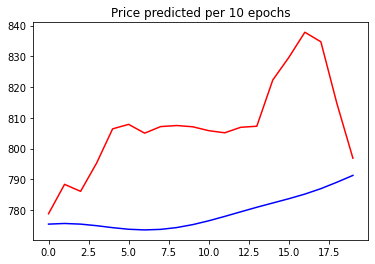

Loop Count 3
Epoch 1/10
38/38 [==============================] - 3s 74ms/step - loss: 0.0043
Epoch 2/10
38/38 [==============================] - 3s 78ms/step - loss: 0.0035
Epoch 3/10
38/38 [==============================] - 3s 77ms/step - loss: 0.0034
Epoch 4/10
38/38 [==============================] - 3s 80ms/step - loss: 0.0039
Epoch 5/10
38/38 [==============================] - 3s 77ms/step - loss: 0.0033
Epoch 6/10
38/38 [==============================] - 3s 84ms/step - loss: 0.0032
Epoch 7/10
38/38 [==============================] - 3s 84ms/step - loss: 0.0028
Epoch 8/10
38/38 [==============================] - 3s 82ms/step - loss: 0.0027
Epoch 9/10
38/38 [==============================] - 3s 83ms/step - loss: 0.0030
Epoch 10/10
38/38 [==============================] - 3s 73ms/step - loss: 0.0030


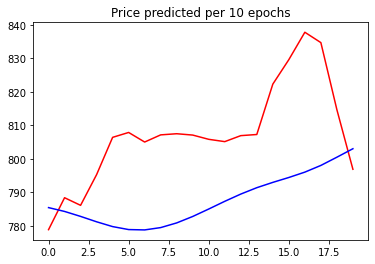

Loop Count 4
Epoch 1/10
38/38 [==============================] - 3s 78ms/step - loss: 0.0031
Epoch 2/10
38/38 [==============================] - 3s 76ms/step - loss: 0.0031
Epoch 3/10
38/38 [==============================] - 3s 75ms/step - loss: 0.0028
Epoch 4/10
38/38 [==============================] - 3s 78ms/step - loss: 0.0029
Epoch 5/10
38/38 [==============================] - 3s 80ms/step - loss: 0.0029
Epoch 6/10
38/38 [==============================] - 3s 85ms/step - loss: 0.0027
Epoch 7/10
38/38 [==============================] - 3s 91ms/step - loss: 0.0025
Epoch 8/10
38/38 [==============================] - 4s 95ms/step - loss: 0.0030
Epoch 9/10
38/38 [==============================] - 5s 122ms/step - loss: 0.0028
Epoch 10/10
38/38 [==============================] - 5s 123ms/step - loss: 0.0024


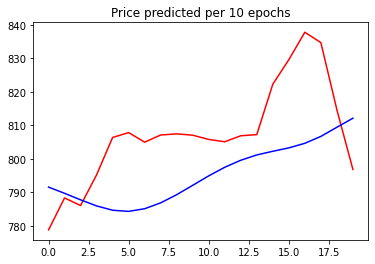

Loop Count 5
Epoch 1/10
38/38 [==============================] - 5s 120ms/step - loss: 0.0026
Epoch 2/10
38/38 [==============================] - 5s 121ms/step - loss: 0.0026
Epoch 3/10
38/38 [==============================] - 5s 120ms/step - loss: 0.0025
Epoch 4/10
38/38 [==============================] - 5s 126ms/step - loss: 0.0023
Epoch 5/10
38/38 [==============================] - 5s 128ms/step - loss: 0.0026
Epoch 6/10
38/38 [==============================] - 5s 127ms/step - loss: 0.0024
Epoch 7/10
38/38 [==============================] - 5s 127ms/step - loss: 0.0023
Epoch 8/10
38/38 [==============================] - 5s 125ms/step - loss: 0.0025
Epoch 9/10
38/38 [==============================] - 5s 125ms/step - loss: 0.0024
Epoch 10/10
38/38 [==============================] - 4s 100ms/step - loss: 0.0023


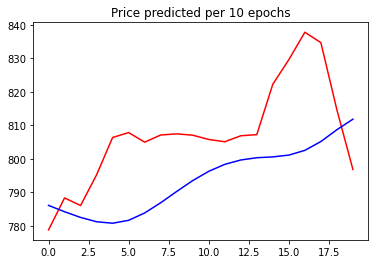

Loop Count 6
Epoch 1/10
38/38 [==============================] - 3s 83ms/step - loss: 0.0025
Epoch 2/10
38/38 [==============================] - 3s 89ms/step - loss: 0.0024
Epoch 3/10
38/38 [==============================] - 3s 92ms/step - loss: 0.0022
Epoch 4/10
38/38 [==============================] - 3s 88ms/step - loss: 0.0024
Epoch 5/10
38/38 [==============================] - 3s 86ms/step - loss: 0.0022
Epoch 6/10
38/38 [==============================] - 3s 92ms/step - loss: 0.0022
Epoch 7/10
38/38 [==============================] - 4s 93ms/step - loss: 0.0021
Epoch 8/10
38/38 [==============================] - 4s 92ms/step - loss: 0.0020
Epoch 9/10
38/38 [==============================] - 3s 82ms/step - loss: 0.0021
Epoch 10/10
38/38 [==============================] - 3s 80ms/step - loss: 0.0019


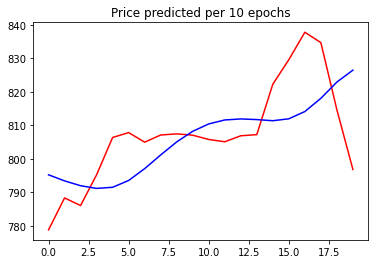

Loop Count 7
Epoch 1/10
38/38 [==============================] - 3s 77ms/step - loss: 0.0020
Epoch 2/10
38/38 [==============================] - 3s 77ms/step - loss: 0.0022
Epoch 3/10
38/38 [==============================] - 3s 79ms/step - loss: 0.0020
Epoch 4/10
38/38 [==============================] - 3s 82ms/step - loss: 0.0018
Epoch 5/10
38/38 [==============================] - 3s 80ms/step - loss: 0.0021
Epoch 6/10
38/38 [==============================] - 3s 77ms/step - loss: 0.0018
Epoch 7/10
38/38 [==============================] - 3s 78ms/step - loss: 0.0019
Epoch 8/10
38/38 [==============================] - 3s 84ms/step - loss: 0.0019
Epoch 9/10
38/38 [==============================] - 3s 91ms/step - loss: 0.0018
Epoch 10/10
38/38 [==============================] - 3s 89ms/step - loss: 0.0019


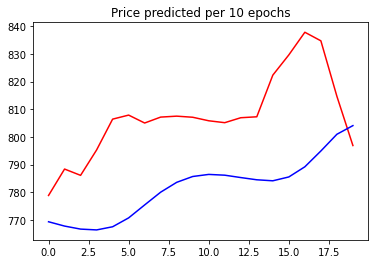

Loop Count 8
Epoch 1/10
38/38 [==============================] - 3s 91ms/step - loss: 0.0019
Epoch 2/10
38/38 [==============================] - 3s 92ms/step - loss: 0.0019
Epoch 3/10
38/38 [==============================] - 3s 88ms/step - loss: 0.0016
Epoch 4/10
38/38 [==============================] - 4s 95ms/step - loss: 0.0017
Epoch 5/10
38/38 [==============================] - 4s 95ms/step - loss: 0.0019
Epoch 6/10
38/38 [==============================] - 3s 88ms/step - loss: 0.0017
Epoch 7/10
38/38 [==============================] - 3s 90ms/step - loss: 0.0019
Epoch 8/10
38/38 [==============================] - 3s 89ms/step - loss: 0.0018
Epoch 9/10
38/38 [==============================] - 3s 88ms/step - loss: 0.0017
Epoch 10/10
38/38 [==============================] - 4s 92ms/step - loss: 0.0018


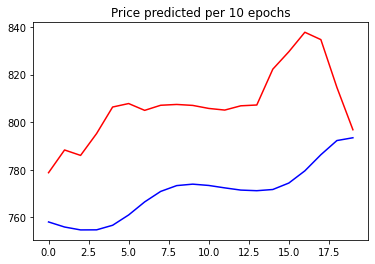

Loop Count 9
Epoch 1/10
38/38 [==============================] - 3s 86ms/step - loss: 0.0016
Epoch 2/10
38/38 [==============================] - 3s 90ms/step - loss: 0.0016
Epoch 3/10
38/38 [==============================] - 3s 91ms/step - loss: 0.0016
Epoch 4/10
38/38 [==============================] - 3s 85ms/step - loss: 0.0017
Epoch 5/10
38/38 [==============================] - 3s 89ms/step - loss: 0.0016
Epoch 6/10
38/38 [==============================] - 3s 91ms/step - loss: 0.0015
Epoch 7/10
38/38 [==============================] - 3s 89ms/step - loss: 0.0016
Epoch 8/10
38/38 [==============================] - 4s 92ms/step - loss: 0.0016
Epoch 9/10
38/38 [==============================] - 4s 92ms/step - loss: 0.0017
Epoch 10/10
38/38 [==============================] - 3s 87ms/step - loss: 0.0015


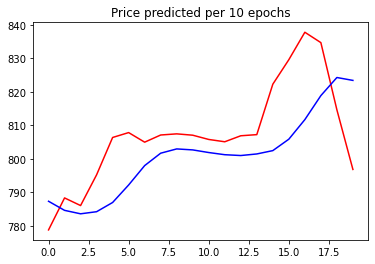

Loop Count 10
Epoch 1/10
38/38 [==============================] - 3s 88ms/step - loss: 0.0016
Epoch 2/10
38/38 [==============================] - 3s 92ms/step - loss: 0.0016
Epoch 3/10
38/38 [==============================] - 3s 92ms/step - loss: 0.0015
Epoch 4/10
38/38 [==============================] - 3s 86ms/step - loss: 0.0015
Epoch 5/10
38/38 [==============================] - 4s 96ms/step - loss: 0.0014
Epoch 6/10
38/38 [==============================] - 3s 84ms/step - loss: 0.0017
Epoch 7/10
38/38 [==============================] - 3s 83ms/step - loss: 0.0015
Epoch 8/10
38/38 [==============================] - 3s 80ms/step - loss: 0.0016
Epoch 9/10
38/38 [==============================] - 3s 79ms/step - loss: 0.0016
Epoch 10/10
38/38 [==============================] - 3s 82ms/step - loss: 0.0015


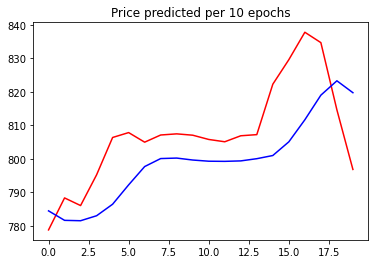

Loop Count 11
Epoch 1/10
38/38 [==============================] - 3s 79ms/step - loss: 0.0015
Epoch 2/10
38/38 [==============================] - 3s 79ms/step - loss: 0.0014
Epoch 3/10
38/38 [==============================] - 3s 80ms/step - loss: 0.0013
Epoch 4/10
38/38 [==============================] - 3s 79ms/step - loss: 0.0015
Epoch 5/10
38/38 [==============================] - 3s 79ms/step - loss: 0.0014
Epoch 6/10
38/38 [==============================] - 3s 82ms/step - loss: 0.0013
Epoch 7/10
38/38 [==============================] - 3s 79ms/step - loss: 0.0014
Epoch 8/10
38/38 [==============================] - 3s 82ms/step - loss: 0.0014
Epoch 9/10
38/38 [==============================] - 3s 83ms/step - loss: 0.0014
Epoch 10/10
38/38 [==============================] - 3s 83ms/step - loss: 0.0012


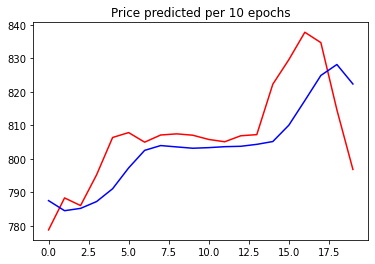

Loop Count 12
Epoch 1/10
38/38 [==============================] - 3s 80ms/step - loss: 0.0013
Epoch 2/10
38/38 [==============================] - 3s 78ms/step - loss: 0.0013
Epoch 3/10
38/38 [==============================] - 3s 78ms/step - loss: 0.0013
Epoch 4/10
38/38 [==============================] - 3s 80ms/step - loss: 0.0013
Epoch 5/10
38/38 [==============================] - 3s 84ms/step - loss: 0.0013
Epoch 6/10
38/38 [==============================] - 3s 82ms/step - loss: 0.0014
Epoch 7/10
38/38 [==============================] - 3s 83ms/step - loss: 0.0013
Epoch 8/10
38/38 [==============================] - 3s 79ms/step - loss: 0.0012
Epoch 9/10
38/38 [==============================] - 3s 78ms/step - loss: 0.0013
Epoch 10/10
38/38 [==============================] - 3s 80ms/step - loss: 0.0014


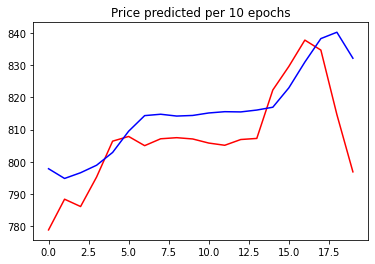

In [14]:
for i in range(12):
    print("Loop Count",i+1)
    reg.fit(X_train, Y_train, epochs=10, batch_size=32)
    predicted_stock_price = reg.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

    plt.title("Price predicted per 10 epochs")
    plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
    plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
    plt.show()

We can compare the result with each iteration of 10 epochs. Furthur try may improve the result. Since the loss is not getting changed we are not overfitting the module.